# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects.

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy*

**1.** Import pandas under the alias `pd`.

In [1]:
import pandas as pd


**2.** Print the version of pandas that has been imported.

In [2]:
print(pd.__version__)

2.2.2


**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [3]:
pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(



INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.10.12.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.1.85+
Version               : #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.2
dateutil              : 2.8.2
setuptools            : 75.1.0
pip                   : 24.1.2
Cython                : 3.0.11
pytest                : 8.3.3
hypothesis            : None
sphinx                : 8.1.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.3.0
html5lib              : 1.1
pymysql               : None
psycopg2   

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [6]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [7]:
# Menampilkan ringkasan informasi dasar tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**6.** Return the first 3 rows of the DataFrame `df`.

In [8]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [9]:
# Memilih kolom 'animal' dan 'age'
df[['animal', 'age']]


,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [10]:
# Memilih data di baris [3, 4, 8] dan kolom ['animal', 'age']
df.loc[['d', 'e', 'i'], ['animal', 'age']]


,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [11]:
# Memilih baris di mana jumlah kunjungan ('visits') lebih dari 3
df[df['visits'] > 3]


,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [12]:
# Memilih baris di mana kolom 'age' bernilai NaN
df[df['age'].isna()]


,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [13]:
# Memilih baris di mana hewan adalah 'cat' dan usia kurang dari 3
df[(df['animal'] == 'cat') & (df['age'] < 3)]


,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [14]:
# Memilih baris di mana usia ('age') antara 2 dan 4 (termasuk)
df[(df['age'] >= 2) & (df['age'] <= 4)]


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [16]:
# Mengubah nilai 'age' pada baris 'f' menjadi 1.5
df.at['f', 'age'] = 1.5


**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [17]:
# Menghitung jumlah total kunjungan
total_visits = df['visits'].sum()
print(total_visits)


19


**15.** Calculate the mean age for each different animal in `df`.

In [18]:
# Menghitung rata-rata usia untuk setiap jenis hewan
mean_age_per_animal = df.groupby('animal')['age'].mean()
print(mean_age_per_animal)


animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64


**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [19]:
# Menambahkan baris baru dengan label 'k'
df.loc['k'] = ['dog', 4, 2, 'yes']

# Menghapus baris 'k' untuk mengembalikan DataFrame ke keadaan semula
df = df.drop('k')


**17.** Count the number of each type of animal in `df`.

In [20]:
# Menghitung jumlah masing-masing jenis hewan
animal_counts = df['animal'].value_counts()
print(animal_counts)


animal
cat      4
dog      4
snake    2
Name: count, dtype: int64


**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [21]:
# Mengurutkan DataFrame berdasarkan 'age' (descending) dan 'visits' (ascending)
df_sorted = df.sort_values(by=['age', 'visits'], ascending=[False, True])
print(df_sorted)


  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
j    dog  3.0       1       no
b    cat  3.0       3      yes
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
h    cat  NaN       1      yes
d    dog  NaN       3      yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [22]:
# Mengganti nilai 'yes' dengan True dan 'no' dengan False pada kolom 'priority'
df['priority'] = df['priority'].replace({'yes': True, 'no': False})


<ipython-input-22-59bd64550b34>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['priority'] = df['priority'].replace({'yes': True, 'no': False})


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [23]:
# Mengganti nilai 'snake' dengan 'python' pada kolom 'animal'
df['animal'] = df['animal'].replace('snake', 'python')


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [24]:
# Membuat tabel pivot untuk menghitung rata-rata usia berdasarkan jenis hewan dan jumlah kunjungan
pivot_table = df.pivot_table(values='age', index='animal', columns='visits', aggfunc='mean')

# Menampilkan hasil tabel pivot
print(pivot_table)


visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [25]:
# Membuat DataFrame
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

# Menyaring baris-baris yang memiliki nilai berbeda dari baris sebelumnya
filtered_df = df[df['A'] != df['A'].shift()]

print(filtered_df)

   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [26]:
# Membuat DataFrame dengan nilai acak
df = pd.DataFrame(np.random.random(size=(5, 3)))

# Mengurangi rata-rata setiap baris dari elemen-elemen pada baris tersebut
df_subtracted = df.sub(df.mean(axis=1), axis=0)

# Menampilkan hasil
print(df_subtracted)

          0         1         2
0 -0.504213  0.420785  0.083427
1  0.085143 -0.081036 -0.004107
2  0.244243 -0.149094 -0.095148
3  0.144377 -0.236247  0.091871
4 -0.200390  0.358250 -0.157860


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [27]:
# Membuat DataFrame dengan 10 kolom
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

# Menemukan kolom dengan jumlah terkecil
column_with_smallest_sum = df.sum().idxmin()

print(column_with_smallest_sum)

f


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [28]:
# Membuat DataFrame dengan 10 baris dan 3 kolom (nilai 0 dan 1)
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

# Menghitung jumlah baris unik
unique_rows_count = df.drop_duplicates().shape[0]

print(unique_rows_count)

6


The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [29]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

# write a solution to the question here

**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [30]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'),
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# write a solution to the question here

**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [31]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

# write a solution to the question here

## DataFrames: harder problems

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [32]:
# Membuat DataFrame
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Fungsi untuk menghitung perbedaan ke nol sebelumnya
def count_back_to_zero(series):
    count = 0
    result = []

    for value in series:
        if value == 0:
            count = 0
            result.append(count)
        else:
            count += 1
            result.append(count)

    return result

# Menambahkan hasil perhitungan sebagai kolom baru
df['diff_to_previous_zero'] = count_back_to_zero(df['X'])

print(df)

   X  diff_to_previous_zero
0  7                      1
1  2                      2
2  0                      0
3  3                      1
4  4                      2
5  2                      3
6  5                      4
7  0                      0
8  3                      1
9  4                      2


**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [33]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))

**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15),
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [34]:
# Membuat DataFrame
df = pd.DataFrame({
    "vals": np.random.RandomState(31).randint(-30, 30, size=15),
    "grps": np.random.RandomState(31).choice(["A", "B"], 15)
})

# Menghitung rata-rata 'vals' untuk setiap grup
group_means = df.groupby('grps')['vals'].transform('mean')

# Membuat kolom 'patched_values' dengan mengganti nilai negatif di 'vals' dengan rata-rata grup
df['patched_values'] = df['vals'].where(df['vals'] >= 0, group_means)

# Menampilkan hasil
print(df)

    vals grps  patched_values
0    -12    A       -0.333333
1     -7    B        6.333333
2    -14    A       -0.333333
3      4    A        4.000000
4     -7    A       -0.333333
5     28    B       28.000000
6     -2    A       -0.333333
7     -1    A       -0.333333
8      8    A        8.000000
9     -2    B        6.333333
10    28    A       28.000000
11    12    A       12.000000
12    16    A       16.000000
13   -24    A       -0.333333
14   -12    A       -0.333333


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [35]:
# Membuat DataFrame
df = pd.DataFrame({
    'group': list('aabbabbbabab'),
    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]
})

# Menghitung rolling mean per grup, mengabaikan nilai NaN
df['rolling_mean'] = df.groupby('group')['value'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

# Menampilkan hasil
print(df)

   group  value  rolling_mean
0      a    1.0      1.000000
1      a    2.0      1.500000
2      b    3.0      3.000000
3      b    NaN      3.000000
4      a    2.0      1.666667
5      b    3.0      3.000000
6      b    NaN      3.000000
7      b    1.0      2.000000
8      a    7.0      3.666667
9      b    3.0      2.000000
10     a    NaN      4.500000
11     b    8.0      4.000000


## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [36]:
# Membuat DatetimeIndex untuk setiap hari kerja di tahun 2015
business_days_2015 = pd.date_range('2015-01-01', '2015-12-31', freq='B')

# Membuat Series dengan angka acak dan menggunakan business_days_2015 sebagai indeks
random_series = pd.Series(np.random.rand(len(business_days_2015)), index=business_days_2015)

# Menampilkan hasil
print(random_series)

2015-01-01    0.662014
2015-01-02    0.357090
2015-01-05    0.298323
2015-01-06    0.627047
2015-01-07    0.037117
                ...   
2015-12-25    0.314793
2015-12-28    0.049752
2015-12-29    0.252069
2015-12-30    0.538707
2015-12-31    0.639112
Freq: B, Length: 261, dtype: float64


**34.** Find the sum of the values in `s` for every Wednesday.

In [37]:
# Filter untuk hari Rabu (weekday == 2)
wednesday_sum = random_series[random_series.index.weekday == 2].sum()

# Menampilkan hasil
print(wednesday_sum)

25.132800306214648


**35.** For each calendar month in `s`, find the mean of values.

In [38]:
# Menghitung rata-rata nilai untuk setiap bulan kalender
monthly_mean = random_series.resample('M').mean()

# Menampilkan hasil
print(monthly_mean)


2015-01-31    0.453390
2015-02-28    0.572235
2015-03-31    0.496547
2015-04-30    0.489318
2015-05-31    0.500192
2015-06-30    0.444283
2015-07-31    0.386788
2015-08-31    0.474986
2015-09-30    0.506553
2015-10-31    0.557595
2015-11-30    0.533439
2015-12-31    0.501865
Freq: ME, dtype: float64


<ipython-input-38-dcc6a279f831>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = random_series.resample('M').mean()


**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [43]:
# Membuat DataFrame dengan random values dan DatetimeIndex
business_days_2015 = pd.date_range('2015-01-01', '2015-12-31', freq='B')
random_series = pd.Series(np.random.rand(len(business_days_2015)), index=business_days_2015)

# Resample data berdasarkan bulan untuk mendapatkan data bulanan
monthly_data = random_series.resample('M').mean()

# Membagi data menjadi kelompok 4 bulan berturut-turut
# Kita bisa menggunakan iterasi manual untuk mengelompokkan 4 bulan berturut-turut
dates_of_max_values = []

for i in range(len(monthly_data) - 3):  # -3 untuk memastikan kita mendapatkan 4 bulan berturut-turut
    window = monthly_data.iloc[i:i+4]
    max_date = window.idxmax()  # Menemukan tanggal dengan nilai tertinggi di window
    dates_of_max_values.append(max_date)

# Membuat hasil sebagai Series dengan index mulai dari bulan pertama
result = pd.Series(dates_of_max_values, index=monthly_data.index[3:])

# Menampilkan hasil
print(result)

2015-04-30   2015-04-30
2015-05-31   2015-04-30
2015-06-30   2015-04-30
2015-07-31   2015-04-30
2015-08-31   2015-08-31
2015-09-30   2015-08-31
2015-10-31   2015-08-31
2015-11-30   2015-08-31
2015-12-31   2015-12-31
Freq: ME, dtype: datetime64[ns]


<ipython-input-43-bd5a3638a498>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = random_series.resample('M').mean()


**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [49]:
# Membuat DateTimeIndex untuk setiap Kamis di tahun 2015 dan 2016
date_range = pd.date_range('2015-01-01', '2016-12-31', freq='W-THU')

# Menyaring Kamis yang jatuh pada atau setelah tanggal 15 (minggu ketiga)
third_thursdays = date_range[date_range.day >= 15]

# Mengonversi menjadi DataFrame untuk mempermudah pengelompokan
third_thursdays_df = pd.DataFrame({'date': third_thursdays})

# Menambahkan kolom bulan dan tahun
third_thursdays_df['month'] = third_thursdays_df['date'].dt.month
third_thursdays_df['year'] = third_thursdays_df['date'].dt.year

# Mengelompokkan berdasarkan tahun dan bulan, kemudian memilih Kamis ketiga
third_thursdays_grouped = third_thursdays_df.groupby(['year', 'month']).nth(2)

# Menampilkan hasil
print(third_thursdays_grouped)

         date  month  year
2  2015-01-29      1  2015
9  2015-04-30      4  2015
16 2015-07-30      7  2015
23 2015-10-29     10  2015
28 2015-12-31     12  2015
35 2016-03-31      3  2016
42 2016-06-30      6  2016
49 2016-09-29      9  2016
56 2016-12-29     12  2016


## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [50]:
# DataFrame yang diberikan
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                '12. Air France', '"Swiss Air"']
})

# Isi nilai NaN pada kolom FlightNumber dengan bertambah 10 setiap baris
df['FlightNumber'] = df['FlightNumber'].fillna(method='ffill') + (df['FlightNumber'].isna()).cumsum() * 10

# Pastikan kolom FlightNumber menjadi integer
df['FlightNumber'] = df['FlightNumber'].astype(int)

# Menampilkan hasil
print(df)

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10075  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10085          [13]       12. Air France
4   Brussels_londOn         10105      [67, 32]          "Swiss Air"


<ipython-input-50-1137e4514fab>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FlightNumber'] = df['FlightNumber'].fillna(method='ffill') + (df['FlightNumber'].isna()).cumsum() * 10


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [51]:
# DataFrame yang diberikan
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                '12. Air France', '"Swiss Air"']
})

# Membagi kolom 'From_To' menjadi dua kolom baru 'From' dan 'To'
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']

# Menampilkan DataFrame sementara
print(temp)

       From         To
0    LoNDon      paris
1    MAdrid      miLAN
2    londON  StockhOlm
3  Budapest      PaRis
4  Brussels     londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [52]:
# DataFrame yang diberikan
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                '12. Air France', '"Swiss Air"']
})

# Membagi kolom 'From_To' menjadi dua kolom baru 'From' dan 'To'
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']

# Menstandarkan kapitalisasi nama kota menjadi huruf pertama kapital
temp['From'] = temp['From'].str.title()
temp['To'] = temp['To'].str.title()

# Menampilkan hasil
print(temp)

       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [53]:
# DataFrame yang diberikan
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                '12. Air France', '"Swiss Air"']
})

# Membagi kolom 'From_To' menjadi dua kolom baru 'From' dan 'To'
temp = df['From_To'].str.split('_', expand=True)
temp.columns = ['From', 'To']

# Menstandarkan kapitalisasi nama kota menjadi huruf pertama kapital
temp['From'] = temp['From'].str.title()
temp['To'] = temp['To'].str.title()

# Menghapus kolom 'From_To' dari df dan menambahkan DataFrame temp
df = df.drop('From_To', axis=1)  # Menghapus kolom 'From_To'
df = df.join(temp)  # Menambahkan kolom 'From' dan 'To' dari temp ke df

# Menampilkan hasil
print(df)

   FlightNumber  RecentDelays              Airline      From         To
0       10045.0      [23, 47]               KLM(!)    London      Paris
1           NaN            []    <Air France> (12)    Madrid      Milan
2       10065.0  [24, 43, 87]  (British Airways. )    London  Stockholm
3           NaN          [13]       12. Air France  Budapest      Paris
4       10085.0      [67, 32]          "Swiss Air"  Brussels     London


**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [54]:

# DataFrame yang diberikan
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                '12. Air France', '"Swiss Air"']
})

# Membersihkan kolom 'Airline' dengan menghapus tanda baca dan simbol yang tidak diinginkan
df['Airline'] = df['Airline'].str.replace(r'[^\w\s]', '', regex=True)

# Menampilkan hasil
print(df)

            From_To  FlightNumber  RecentDelays           Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM
1      MAdrid_miLAN           NaN            []     Air France 12
2  londON_StockhOlm       10065.0  [24, 43, 87]  British Airways 
3    Budapest_PaRis           NaN          [13]     12 Air France
4   Brussels_londOn       10085.0      [67, 32]         Swiss Air


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [55]:
# DataFrame yang diberikan
df = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                '12. Air France', '"Swiss Air"']
})

# Mengubah kolom 'RecentDelays' yang berisi list menjadi DataFrame
delays = pd.DataFrame(df['RecentDelays'].to_list())

# Menamai kolom-kolom baru
delays.columns = [f'delay_{i+1}' for i in range(delays.shape[1])]

# Menambahkan kolom delays ke dalam df, menggantikan kolom 'RecentDelays'
df = df.drop('RecentDelays', axis=1)  # Menghapus kolom 'RecentDelays'
df = pd.concat([df, delays], axis=1)  # Menambahkan kolom delays ke df

# Menampilkan hasil
print(df)

            From_To  FlightNumber              Airline  delay_1  delay_2  \
0      LoNDon_paris       10045.0               KLM(!)     23.0     47.0   
1      MAdrid_miLAN           NaN    <Air France> (12)      NaN      NaN   
2  londON_StockhOlm       10065.0  (British Airways. )     24.0     43.0   
3    Budapest_PaRis           NaN       12. Air France     13.0      NaN   
4   Brussels_londOn       10085.0          "Swiss Air"     67.0     32.0   

   delay_3  
0      NaN  
1      NaN  
2     87.0  
3      NaN  
4      NaN  


The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels.

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [56]:
# Daftar yang diberikan
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat produk dari kedua daftar
multi_index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan random numbers yang diindeks oleh MultiIndex
s = pd.Series(np.random.random(len(multi_index)), index=multi_index)

# Menampilkan hasil
print(s)

Letter  Number
A       0         0.550160
        1         0.005610
        2         0.645463
        3         0.807657
        4         0.975099
        5         0.339230
        6         0.376741
        7         0.870865
        8         0.836609
        9         0.766671
B       0         0.279638
        1         0.539435
        2         0.713414
        3         0.844375
        4         0.546299
        5         0.871079
        6         0.331111
        7         0.443131
        8         0.970848
        9         0.100307
C       0         0.324816
        1         0.662733
        2         0.449827
        3         0.533439
        4         0.206199
        5         0.606954
        6         0.822385
        7         0.224301
        8         0.135606
        9         0.230633
dtype: float64


**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [59]:
# Daftar yang diberikan
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat produk dari kedua daftar
multi_index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan random numbers yang diindeks oleh MultiIndex
s = pd.Series(np.random.random(len(multi_index)), index=multi_index)

# Memeriksa apakah indeks MultiIndex sudah terurut secara lexicographically
is_sorted = s.index.equals(s.index.sort_values())

# Menampilkan hasil awal
print(f"Is the index lexicographically sorted? {is_sorted}")

# Jika indeks belum terurut, urutkan indeks
if not is_sorted:
    s = s.sort_index()

    # Memeriksa kembali apakah sudah terurut
    is_sorted = s.index.equals(s.index.sort_values())
    print("Index was not sorted, now it has been sorted.")

# Menampilkan hasil akhir
print(f"Is the index lexicographically sorted now? {is_sorted}")

Is the index lexicographically sorted? True
Is the index lexicographically sorted now? True


**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [62]:
# Membuat MultiIndex dari produk dua daftar
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat MultiIndex
index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan indeks MultiIndex
s = pd.Series(np.random.random(len(index)), index=index)

# Memilih label 1, 3, dan 6 dari level kedua ('Number') pada MultiIndex
selected_values = s[s.index.get_level_values('Number').isin([1, 3, 6])]

# Menampilkan hasil
print(selected_values)

Letter  Number
A       1         0.843897
        3         0.238692
        6         0.391325
B       1         0.755451
        3         0.155452
        6         0.219529
C       1         0.995309
        3         0.108963
        6         0.181976
dtype: float64


**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [63]:
# Membuat MultiIndex dari produk dua daftar
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat MultiIndex
index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan indeks MultiIndex
s = pd.Series(np.random.random(len(index)), index=index)

# Melakukan slicing hingga label 'B' pada level pertama dan mulai dari label 5 pada level kedua
sliced_values = s.loc[slice(None, 'B'), slice(5, None)]

# Menampilkan hasil
print(sliced_values)

Letter  Number
A       5         0.474020
        6         0.120036
        7         0.620624
        8         0.179098
        9         0.306416
B       5         0.639302
        6         0.626882
        7         0.393023
        8         0.608216
        9         0.637006
dtype: float64


**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [64]:
# Membuat MultiIndex dari produk dua daftar
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat MultiIndex
index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan indeks MultiIndex
s = pd.Series(np.random.random(len(index)), index=index)

# Menghitung jumlah nilai untuk setiap label di level pertama (Letter)
sum_per_letter = s.groupby('Letter').sum()

# Menampilkan hasil
print(sum_per_letter)

Letter
A    4.646974
B    6.782453
C    6.374592
dtype: float64


**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [65]:
# Membuat MultiIndex dari produk dua daftar
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat MultiIndex
index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan indeks MultiIndex
s = pd.Series(np.random.random(len(index)), index=index)

# Mengelompokkan berdasarkan level 1 (Number) dan menjumlahkan
sum_level_1 = s.groupby(level=1).sum()

# Menampilkan hasil
print(sum_level_1)

Number
0    1.520963
1    1.524109
2    1.255030
3    2.103216
4    1.308158
5    1.043059
6    1.264655
7    0.996805
8    1.566018
9    0.853188
dtype: float64


**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [66]:
# Membuat MultiIndex dari produk dua daftar
letters = ['A', 'B', 'C']
numbers = list(range(10))

# Membuat MultiIndex
index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

# Membuat Series dengan indeks MultiIndex
s = pd.Series(np.random.random(len(index)), index=index)

# Menukar level pada MultiIndex
s_swapped = s.swaplevel()

# Memeriksa apakah indeks sudah terurut secara lexicographically
if not s_swapped.index.is_monotonic_increasing:
    # Jika tidak terurut, urutkan berdasarkan indeks
    s_swapped = s_swapped.sort_index()

# Menampilkan hasil
print(s_swapped)

Number  Letter
0       A         0.430191
        B         0.837602
        C         0.202176
1       A         0.774055
        B         0.396020
        C         0.423700
2       A         0.797541
        B         0.181912
        C         0.812517
3       A         0.093609
        B         0.898474
        C         0.685541
4       A         0.851429
        B         0.845670
        C         0.780091
5       A         0.289502
        B         0.104289
        C         0.069734
6       A         0.811261
        B         0.181575
        C         0.619425
7       A         0.864165
        B         0.444392
        C         0.959597
8       A         0.307880
        B         0.870027
        C         0.928734
9       A         0.845433
        B         0.567171
        C         0.243937
dtype: float64


## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [67]:
# Menentukan dimensi grid
X = 5
Y = 4

# Membuat grid koordinat menggunakan np.meshgrid
x_coords, y_coords = np.meshgrid(range(X), range(Y))

# Meratakan array dan membuat DataFrame
df = pd.DataFrame({
    'x': x_coords.flatten(),
    'y': y_coords.flatten()
})

# Menampilkan DataFrame
print(df)

    x  y
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0
5   0  1
6   1  1
7   2  1
8   3  1
9   4  1
10  0  2
11  1  2
12  2  2
13  3  2
14  4  2
15  0  3
16  1  3
17  2  3
18  3  3
19  4  3


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [68]:
# Menentukan dimensi grid
X = 5
Y = 4

# Membuat grid koordinat menggunakan np.meshgrid
x_coords, y_coords = np.meshgrid(range(X), range(Y))

# Meratakan array dan membuat DataFrame
df = pd.DataFrame({
    'x': x_coords.flatten(),
    'y': y_coords.flatten()
})

# Menambahkan kolom baru 'mine' dengan probabilitas ranjau (mine) sebesar 0.4
df['mine'] = np.random.choice([0, 1], size=df.shape[0], p=[0.6, 0.4])

# Menampilkan DataFrame
print(df)

    x  y  mine
0   0  0     0
1   1  0     0
2   2  0     0
3   3  0     0
4   4  0     0
5   0  1     1
6   1  1     0
7   2  1     0
8   3  1     1
9   4  1     0
10  0  2     1
11  1  2     1
12  2  2     0
13  3  2     1
14  4  2     1
15  0  3     0
16  1  3     0
17  2  3     0
18  3  3     0
19  4  3     0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [69]:
# Menentukan dimensi grid
X = 5
Y = 4

# Membuat grid koordinat menggunakan np.meshgrid
x_coords, y_coords = np.meshgrid(range(X), range(Y))

# Meratakan array dan membuat DataFrame
df = pd.DataFrame({
    'x': x_coords.flatten(),
    'y': y_coords.flatten()
})

# Menambahkan kolom baru 'mine' dengan probabilitas ranjau (mine) sebesar 0.4
df['mine'] = np.random.choice([0, 1], size=df.shape[0], p=[0.6, 0.4])

# Fungsi untuk menghitung jumlah ranjau di petak-petak tetangga
def count_adjacent_mines(x, y, mine_column, X, Y):
    # Menentukan koordinat petak-petak tetangga yang valid
    adjacent_coords = [
        (x-1, y-1), (x-1, y), (x-1, y+1),
        (x, y-1), (x, y+1),
        (x+1, y-1), (x+1, y), (x+1, y+1)
    ]

    # Menghitung jumlah ranjau (mine) di petak-petak yang valid
    mine_count = 0
    for nx, ny in adjacent_coords:
        # Memastikan koordinat tetangga tetap berada di dalam grid
        if 0 <= nx < X and 0 <= ny < Y:
            mine_count += mine_column[(mine_column['x'] == nx) & (mine_column['y'] == ny)]['mine'].values[0]

    return mine_count

# Menambahkan kolom 'adjacent' dengan menghitung jumlah ranjau pada petak-petak tetangga
df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row['x'], row['y'], df, X, Y), axis=1)

# Menampilkan DataFrame
print(df)

    x  y  mine  adjacent
0   0  0     1         1
1   1  0     0         3
2   2  0     1         2
3   3  0     1         2
4   4  0     1         1
5   0  1     0         3
6   1  1     1         4
7   2  1     0         5
8   3  1     0         4
9   4  1     0         2
10  0  2     0         3
11  1  2     1         3
12  2  2     1         3
13  3  2     0         1
14  4  2     0         0
15  0  3     0         2
16  1  3     1         2
17  2  3     0         3
18  3  3     0         1
19  4  3     0         0


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [70]:
# Menentukan dimensi grid
X = 5
Y = 4

# Membuat grid koordinat menggunakan np.meshgrid
x_coords, y_coords = np.meshgrid(range(X), range(Y))

# Meratakan array dan membuat DataFrame
df = pd.DataFrame({
    'x': x_coords.flatten(),
    'y': y_coords.flatten()
})

# Menambahkan kolom baru 'mine' dengan probabilitas ranjau (mine) sebesar 0.4
df['mine'] = np.random.choice([0, 1], size=df.shape[0], p=[0.6, 0.4])

# Fungsi untuk menghitung jumlah ranjau di petak-petak tetangga
def count_adjacent_mines(x, y, mine_column, X, Y):
    # Menentukan koordinat petak-petak tetangga yang valid
    adjacent_coords = [
        (x-1, y-1), (x-1, y), (x-1, y+1),
        (x, y-1), (x, y+1),
        (x+1, y-1), (x+1, y), (x+1, y+1)
    ]

    # Menyaring koordinat yang berada dalam batas grid
    valid_coords = [
        (i, j) for i, j in adjacent_coords if 0 <= i < X and 0 <= j < Y
    ]

    # Menghitung jumlah ranjau di petak-petak tetangga
    mine_count = 0
    for i, j in valid_coords:
        index = (df['x'] == i) & (df['y'] == j)
        if mine_column[index].iloc[0] == 1:  # Cek apakah ada ranjau
            mine_count += 1

    return mine_count

# Menghitung jumlah ranjau tetangga untuk setiap baris (selain yang mengandung ranjau)
df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row['x'], row['y'], df['mine'], X, Y)
                          if row['mine'] == 0 else np.nan, axis=1)

# Menampilkan DataFrame dengan kolom 'adjacent' yang sudah diperbarui
print(df)

    x  y  mine  adjacent
0   0  0     0       0.0
1   1  0     0       1.0
2   2  0     0       3.0
3   3  0     1       NaN
4   4  0     0       2.0
5   0  1     0       0.0
6   1  1     0       2.0
7   2  1     1       NaN
8   3  1     1       NaN
9   4  1     0       2.0
10  0  2     0       1.0
11  1  2     0       3.0
12  2  2     1       NaN
13  3  2     0       4.0
14  4  2     0       2.0
15  0  3     0       1.0
16  1  3     1       NaN
17  2  3     0       2.0
18  3  3     0       2.0
19  4  3     1       NaN


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [72]:
# Menentukan dimensi grid
X = 5
Y = 4

# Membuat grid koordinat menggunakan np.meshgrid
x_coords, y_coords = np.meshgrid(range(X), range(Y))

# Meratakan array dan membuat DataFrame
df = pd.DataFrame({
    'x': x_coords.flatten(),
    'y': y_coords.flatten()
})

# Menambahkan kolom baru 'mine' dengan probabilitas ranjau (mine) sebesar 0.4
df['mine'] = np.random.choice([0, 1], size=df.shape[0], p=[0.6, 0.4])

# Fungsi untuk menghitung jumlah ranjau di petak-petak tetangga
def count_adjacent_mines(x, y, mine_column, X, Y):
    # Daftar koordinat tetangga yang mungkin (di dalam batas grid)
    adjacent_coords = [
        (x-1, y-1), (x-1, y), (x-1, y+1),
        (x, y-1),           (x, y+1),
        (x+1, y-1), (x+1, y), (x+1, y+1)
    ]

    # Menghitung jumlah ranjau di petak-petak tetangga yang valid
    count = 0
    for (i, j) in adjacent_coords:
        # Memastikan koordinat berada dalam batas grid
        if 0 <= i < X and 0 <= j < Y:
            count += mine_column[(mine_column['x'] == i) & (mine_column['y'] == j)]['mine'].values[0]
    return count

# Menghitung nilai 'adjacent' untuk setiap koordinat yang aman (bukan ranjau)
df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row['x'], row['y'], df, X, Y)
                          if row['mine'] == 0 else np.nan, axis=1)

# Mengonversi DataFrame ke dalam format grid (pivot table)
grid_adjacent = df.pivot(index='y', columns='x', values='adjacent')

# Menampilkan hasil grid
print(grid_adjacent)

x    0    1    2    3    4
y                         
0  NaN  NaN  3.0  2.0  2.0
1  4.0  NaN  6.0  NaN  NaN
2  2.0  NaN  NaN  NaN  NaN
3  1.0  3.0  NaN  NaN  NaN


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers.

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

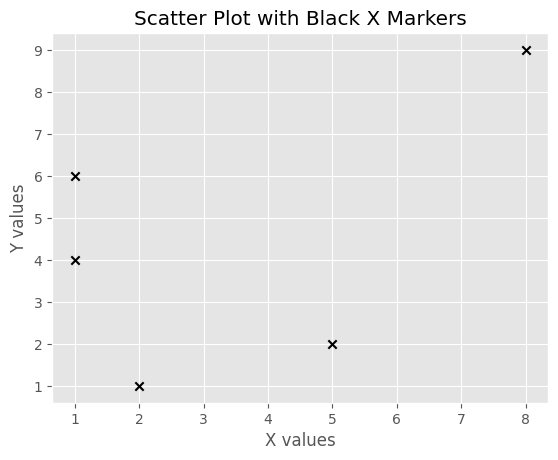

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Setup for inline plotting and style
%matplotlib inline
plt.style.use('ggplot')

# Create the DataFrame
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})

# Scatter plot with black X's as markers
plt.scatter(df['xs'], df['ys'], color='black', marker='x')

# Add labels for clarity
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot with Black X Markers')

# Show the plot
plt.show()

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

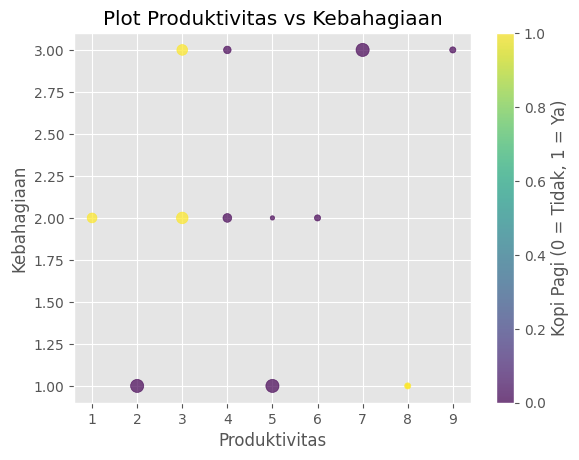

In [74]:
# Membuat DataFrame
df = pd.DataFrame({
    "productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
    "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
    "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
    "caffienated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
})

# Membuat plot scatter dengan ukuran dan warna yang disesuaikan
plt.scatter(
    df['productivity'],  # sumbu x: productivity
    df['happiness'],     # sumbu y: happiness
    s=df['hours_in']*10, # ukuran marker berdasarkan hours_in (dikali 10 agar lebih jelas)
    c=df['caffienated'], # warna marker berdasarkan caffienated (0 atau 1)
    cmap='viridis',      # Pilihan skema warna
    alpha=0.7           # Transparansi
)

# Memberi label pada sumbu
plt.xlabel('Produktivitas')
plt.ylabel('Kebahagiaan')

# Menampilkan plot
plt.title('Plot Produktivitas vs Kebahagiaan')
plt.colorbar(label='Kopi Pagi (0 = Tidak, 1 = Ya)')  # Menambahkan colorbar untuk 'caffienated'
plt.show()

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

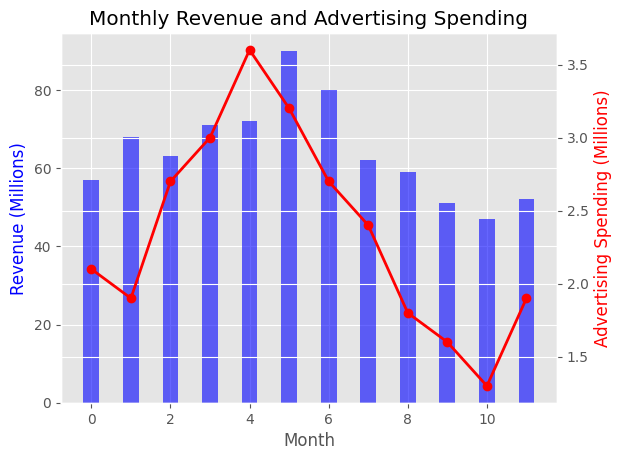

In [75]:
# Membuat DataFrame
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month": range(12)
})

# Membuat figure dan axis
fig, ax1 = plt.subplots()

# Membuat bar plot untuk revenue
ax1.bar(df['month'], df['revenue'], color='b', alpha=0.6, label='Revenue', width=0.4)

# Membuat axis kedua untuk plot garis
ax2 = ax1.twinx()

# Membuat line plot untuk advertising
ax2.plot(df['month'], df['advertising'], color='r', marker='o', label='Advertising', linestyle='-', linewidth=2)

# Menambahkan label dan judul
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (Millions)', color='b')
ax2.set_ylabel('Advertising Spending (Millions)', color='r')
plt.title('Monthly Revenue and Advertising Spending')

# Menampilkan plot
plt.show()

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [76]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))


    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

<ipython-input-77-580a6d87cd82>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)  # mengonversi waktu menjadi tipe datetime
<ipython-input-77-580a6d87cd82>:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  agg = df.resample('H').agg(


                           open        high         low       close  color
time                                                                      
2024-12-05 09:00:00  100.000000  100.071460   98.773542   99.335852    red
2024-12-05 10:00:00   99.308068  100.010416   98.159931   99.434117  green
2024-12-05 11:00:00   99.453265  102.063782   99.366357  101.217032  green
2024-12-05 12:00:00  101.262176  103.294861  100.053108  102.961719  green
2024-12-05 13:00:00  103.034268  105.174937  101.741861  101.754361    red
2024-12-05 14:00:00  101.834773  103.075088   99.860088  101.541661    red
2024-12-05 15:00:00  101.604387  102.115858   97.405174   98.388104    red


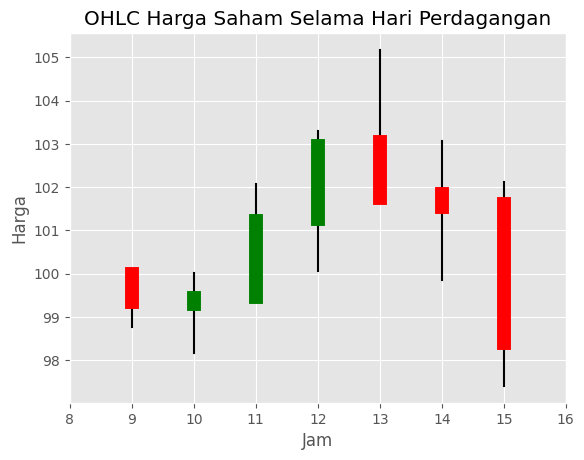

In [77]:
# Fungsi untuk mengonversi waktu ke format jam:menit:detik
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

# Fungsi untuk menghasilkan data saham acak dalam satu hari
def day_stock_data():
    # NYSE buka dari jam 9:30 hingga 4:00
    time = 9.5  # jam 9:30
    price = 100  # harga awal
    results = [(float_to_time(time), price)]  # daftar untuk menyimpan hasil
    while time < 16:  # selama waktu masih di bawah 16:00
        elapsed = np.random.exponential(.001)  # waktu yang berlalu secara acak
        time += elapsed
        if time > 16:  # jika waktu melebihi 16:00, keluar dari loop
            break
        price_diff = np.random.uniform(.999, 1.001)  # perubahan harga secara acak
        price *= price_diff  # update harga
        results.append((float_to_time(time), price))  # simpan waktu dan harga

    # Membuat DataFrame dengan hasil yang telah terkumpul
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)  # mengonversi waktu menjadi tipe datetime
    return df

# Fungsi untuk mengagregasi data saham dan membuat summary per jam
def aggregate_stock_data(df):
    # Mengatur waktu sebagai index
    df.set_index('time', inplace=True)

    # Resampling per jam dan menghitung open, high, low, close
    agg = df.resample('H').agg(
        open=('price', 'first'),
        high=('price', 'max'),
        low=('price', 'min'),
        close=('price', 'last')
    )

    # Menambahkan kolom 'color' untuk menunjukkan naik/turun harga
    agg['color'] = np.where(agg['close'] > agg['open'], 'green', 'red')

    return agg

# Menghasilkan data saham acak untuk satu hari
df = day_stock_data()

# Mengagregasi data saham menjadi summary per jam
agg = aggregate_stock_data(df)

# Menampilkan hasil agregasi
print(agg)

# Fungsi untuk memplot grafik candlestick
def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Harga")
    ax.set_xlabel("Jam")
    ax.set_title("OHLC Harga Saham Selama Hari Perdagangan")
    plt.show()

# Menampilkan grafik candlestick
plot_candlestick(agg)

**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

<ipython-input-78-9ab68d615771>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)  # mengonversi waktu menjadi tipe datetime


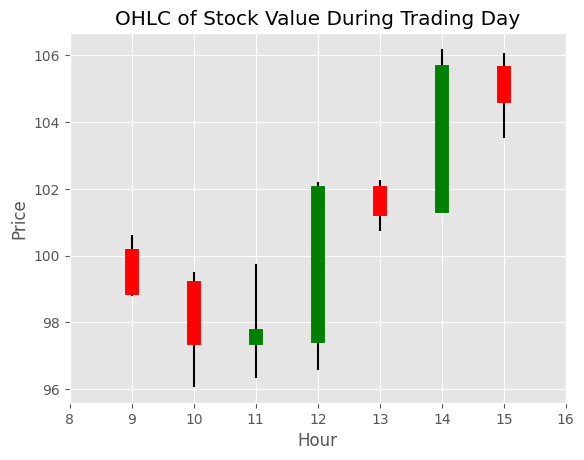

In [78]:
# Fungsi untuk mengonversi waktu ke format jam:menit:detik
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

# Fungsi untuk menghasilkan data saham acak dalam satu hari
def day_stock_data():
    # NYSE buka dari jam 9:30 hingga 4:00
    time = 9.5  # jam 9:30
    price = 100  # harga awal
    results = [(float_to_time(time), price)]  # daftar untuk menyimpan hasil
    while time < 16:  # selama waktu masih di bawah 16:00
        elapsed = np.random.exponential(.001)  # waktu yang berlalu secara acak
        time += elapsed
        if time > 16:  # jika waktu melebihi 16:00, keluar dari loop
            break
        price_diff = np.random.uniform(.999, 1.001)  # perubahan harga secara acak
        price *= price_diff  # update harga
        results.append((float_to_time(time), price))  # simpan waktu dan harga

    # Membuat DataFrame dengan hasil yang telah terkumpul
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)  # mengonversi waktu menjadi tipe datetime
    return df

# Fungsi untuk mengagregasi data saham dan membuat summary per jam
def aggregate_stock_data(df):
    # Menambahkan kolom yang berisi jam (hanya untuk pengelompokkan)
    df['hour'] = df['time'].dt.hour
    # Mengagregasi berdasarkan jam
    agg = df.groupby('hour').agg(
        open=('price', 'first'),  # Harga pertama dalam jam tersebut
        high=('price', 'max'),    # Harga tertinggi dalam jam tersebut
        low=('price', 'min'),     # Harga terendah dalam jam tersebut
        close=('price', 'last')   # Harga terakhir dalam jam tersebut
    )

    # Menambahkan warna untuk harga naik (green) atau turun (red)
    agg['color'] = np.where(agg['close'] > agg['open'], 'green', 'red')
    return agg

# Fungsi untuk memplot data candlestick
def plot_candlestick(agg):
    """
    agg adalah DataFrame yang memiliki index Datetime dan lima kolom: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time] * 2, agg.loc[time, ["high", "low"]].values, color="black")
        ax.plot([time] * 2, agg.loc[time, ["open", "close"]].values, color=agg.loc[time, "color"], linewidth=10)

    ax.set_xlim((8, 16))  # Rentang waktu dari 8 hingga 16
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

# Generate data saham untuk satu hari
df = day_stock_data()

# Agregasi data saham per jam
agg = aggregate_stock_data(df)

# Plot data saham menggunakan candlestick
plot_candlestick(agg)

*More exercises to follow soon...*